In [ ]:
#%%

import scanpy as sc
import os
import configparser

In [ ]:
# %%

config = configparser.ConfigParser()
config.read("config.ini")
rawPath = config.get("DEFAULT", "rawPath")
initDir = rawPath + "atlas_annotated/"

adata = sc.read_h5ad(initDir + "atlas_endothelial_filt_norm_nolog.h5ad")

In [ ]:
#%%

ori_path = "/group/testa/Project/OvarianAtlas/atlas_project/raw_data/atlas_annotated_backup/atlas_annotated/atlas_endothelial_filt_norm_nolog.h5ad"
adata_ma = sc.read_h5ad(ori_path)

In [ ]:
# %%

diff = adata_ma.X  - adata.X

In [ ]:
diff.mean()

np.float64(4.8540164976296215e-11)

In [ ]:
# %%

import seaborn as sns
sns.displot(diff)

TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

In [ ]:
# %%

import seaborn as sns
sns.displot(diff.flatten())

AttributeError: 'csr_matrix' object has no attribute 'flatten'

In [ ]:
diff = diff.toarray()

In [ ]:
diff

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.74770476e-08,  0.00000000e+00, -1.77159741e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.21786876e-07,  8.25703500e-09, -1.71859063e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.18636800e-07,  0.00000000e+00,  2.64089374e-07],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.91881543e-08,  0.00000000e+00,  2.28536825e-08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.64150017e-08, -4.22955959e-09,  8.12520673e-08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.45017361e-08,  0.00000000e+00, -1.74027473e-07]])

In [ ]:
np.true_divide(diff.sum(1),(diff!=0).sum(1))

NameError: name 'np' is not defined

In [ ]:
import numpy as np

In [ ]:
np.true_divide(diff.sum(1),(diff!=0).sum(1))

array([-4.00868864e-08, -2.40037608e-09,  7.00612208e-08, ...,
       -3.27477433e-08, -7.36074349e-09, -1.13399830e-08])

In [ ]:
means_by_cell = np.true_divide(diff.sum(0),(diff!=0).sum(0))

<ipython-input-14-98b961c1eddd>:1: RuntimeWarning: invalid value encountered in divide
  means_by_cell = np.true_divide(diff.sum(0),(diff!=0).sum(0))


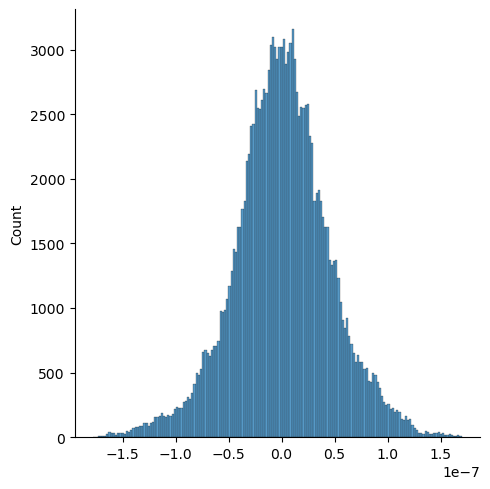

In [ ]:
# %%

import numpy as np
diff_by_gene = np.true_divide(diff.sum(1),(diff!=0).sum(1))
sns.displot(diff_by_gene)